In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
148,6440-DKQGE,Male,0,No,Yes,30,Yes,No,DSL,No,...,Yes,No,Yes,No,One year,No,Credit card (automatic),64.50,1929.95,No
6598,6169-PGNCD,Female,0,No,No,57,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),74.30,4166.35,No
3029,1208-DNHLN,Male,0,Yes,Yes,23,Yes,Yes,DSL,No,...,No,No,No,No,One year,Yes,Credit card (automatic),48.35,1067.15,Yes
454,4785-FCIFB,Female,0,Yes,No,61,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.40,1417.9,No
2648,6131-FOYAS,Male,0,No,No,35,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,59.60,2094.9,No


In [3]:
# drops the column customerID as it is of no use and updates the database
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values # numbers here are of type obj - convert to float

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
# there are spaces in few values
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [7]:
# will convert those values which do not have any spaces
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()] # gets the rows that has spaces in it

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [10]:
df.shape

(7043, 20)

In [11]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [12]:
#it gives no error now..double check
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [13]:
# its still not stored as float in the dataframe
df1.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7032, dtype: object

In [14]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.dtype

C:\Users\ganta\AppData\Local\Temp\ipykernel_3488\4201984123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


dtype('float64')

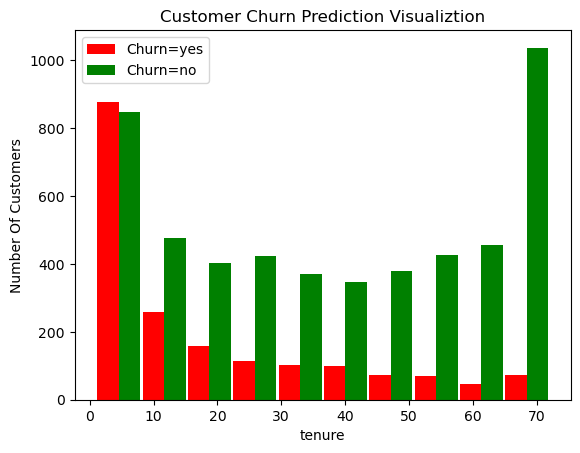

In [15]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=yes','Churn=no'])
plt.legend()

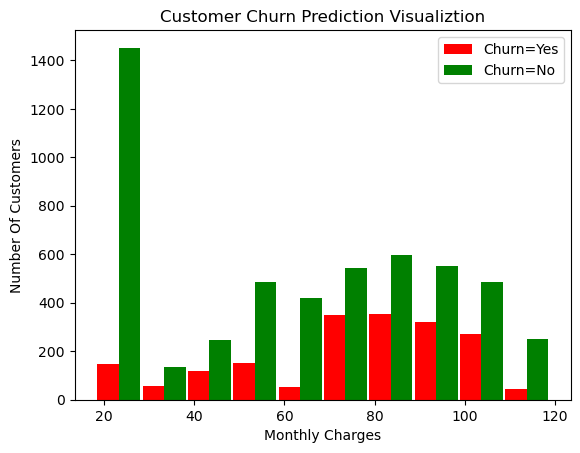

In [16]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [17]:
def print_unique_col_values(df):
    for column in df1:
        if df1[column].dtype == 'object':
            print(f'{column} : {df1[column].unique()}')

In [18]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [19]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\ganta\AppData\Local\Temp\ipykernel_3488\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\ganta\AppData\Local\Temp\ipykernel_3488\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [20]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [21]:
# can directly hard code 1 and 0 instead of onehot as it is straightforward
# cannot directly use replace as it affects columns like these if there are any: InternetService : ['DSL' 'Fiber optic' 'No']
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\ganta\AppData\Local\Temp\ipykernel_3488\854121168.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [22]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [23]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\ganta\AppData\Local\Temp\ipykernel_3488\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [24]:
df1.gender.unique()

array([1, 0], dtype=int64)

**ONE HOT ENCODING**

In [28]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'],dtype=int)
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [29]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4095,0,0,0,0,3,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
5906,1,1,0,0,14,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
5115,0,0,1,0,46,1,0,1,1,1,...,1,0,0,0,0,1,0,0,0,1


In [30]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

**SCALING**

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [33]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [34]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [35]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [36]:
X_train.shape

(5625, 26)

In [37]:
X_test.shape

(1407, 26)

In [38]:
len(X_train.columns)

26

**Model Building ( ANN Model using Tensorflow / Kears )**

In [39]:
import tensorflow as tf
from tensorflow import keras

In [44]:
model_ann = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'), # hidden layer which takes input from the input layer which has 26 neurons(features)
    keras.layers.Dense(1,activation='sigmoid')
])

model_ann.compile( optimizer ='adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

model_ann.fit(X_train,y_train,epochs=20)

Epoch 1/20
176/176 [==============================] - 1s 3ms/step - loss: 0.5191 - accuracy: 0.7337
Epoch 2/20
176/176 [==============================] - 0s 3ms/step - loss: 0.4334 - accuracy: 0.7936
Epoch 3/20
176/176 [==============================] - 0s 2ms/step - loss: 0.4224 - accuracy: 0.8009
Epoch 4/20
176/176 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8028
Epoch 5/20
176/176 [==============================] - 1s 4ms/step - loss: 0.4147 - accuracy: 0.8032
Epoch 6/20
176/176 [==============================] - 0s 3ms/step - loss: 0.4128 - accuracy: 0.8041
Epoch 7/20
176/176 [==============================] - 1s 4ms/step - loss: 0.4119 - accuracy: 0.8071
Epoch 8/20
176/176 [==============================] - 1s 4ms/step - loss: 0.4108 - accuracy: 0.8071
Epoch 9/20
176/176 [==============================] - 0s 3ms/step - loss: 0.4096 - accuracy: 0.8080
Epoch 10/20
176/176 [==============================] - 1s 4ms/step - loss: 0.4087 - accuracy: 0.8062

In [45]:
model_ann.evaluate(X_test,y_test)

44/44 [==============================] - 1s 3ms/step - loss: 0.4394 - accuracy: 0.7932


[0.4393901824951172, 0.7931769490242004]

In [47]:
yp = model_ann.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.14557853],
       [0.31420422],
       [0.00973203],
       [0.75835997],
       [0.40917993]], dtype=float32)

In [48]:
# rescaling
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [52]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0]

In [53]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [67]:
# Comparing Actual vs Predicted
dfc = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dfc

,Actual,Predicted
2660,0,0
744,0,0
5579,1,0
64,1,1
3287,1,0
...,...,...
2024,0,0
4396,1,1
4081,1,1
1297,0,1


In [54]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.68      0.55      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.79      1407



Text(95.72222222222221, 0.5, 'Truth')

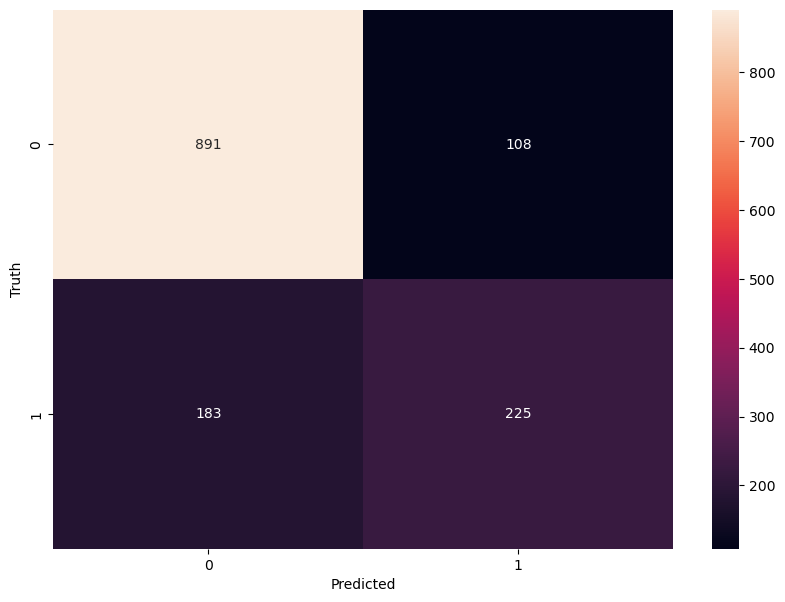

In [56]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Accuracy**

In [60]:
round((891+225)/(891+225+183+108),2) #coorect predictions / total predictions

0.79

**Precision for 0 class. i.e. Precision for customers who did not churn( did not leave the business)**

In [62]:
round((891)/(891+183),2) #how many samples were correct in predicting 0 class

0.83

**Precision for 1 class. i.e. Precision for customers who did churn(leave the business)**

In [63]:
round((225)/(225+108),2)

0.68

**Recall for 0 class**

In [65]:
round(891/(891+108),2) # correct prediction for 0 class / total actual 0 samples

0.89

**Recall for 1 class**

In [66]:
round(225/(225+183),2) # correct prediction for 1 class / total actual 1 samples

0.55